# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

**Цель исследования** — построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.
Научиться определять рыночную стоимость объектов недвижимости. Для этого нужно провести исследовательский анализ данных и установить параметры, влияющие на цену объектов.

**Ход исследования**

Данные о поведении пользователей вы получите из файла `/datasets/real_estate_data.csv`. О качестве данных ничего не известно. Мы проверим данные на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки мы получим возможность исправить самые критичные ошибки данных.

Таким образом, исследование пройдёт в три этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Добавляем новые данные
 4. Исследовательский анализ данных.
 5. Вывод

## Откройте файл с данными и изучите общую информацию

Прежде чем смотреть на данные стоит посмотреть на их описание: 

*Описание данных*
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
pd.set_option('display.max_columns', None)# чтобы выводить все столбцы

In [2]:
data = pd.read_csv('real_estate_data.csv',sep = '\t')
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Мы вывели 10 первых строк массива. Уже заметны некоторые аномалии. Очень много пропущенных значений и дата в столбце `first_day_exposition` записана не в том формате

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Очень большое количество значений отличается по типу переменной, например в столбце `is_apartment` значения приняли тип object, хотя должны быть типом bool.
Об этом подробнее распишем в предобработке

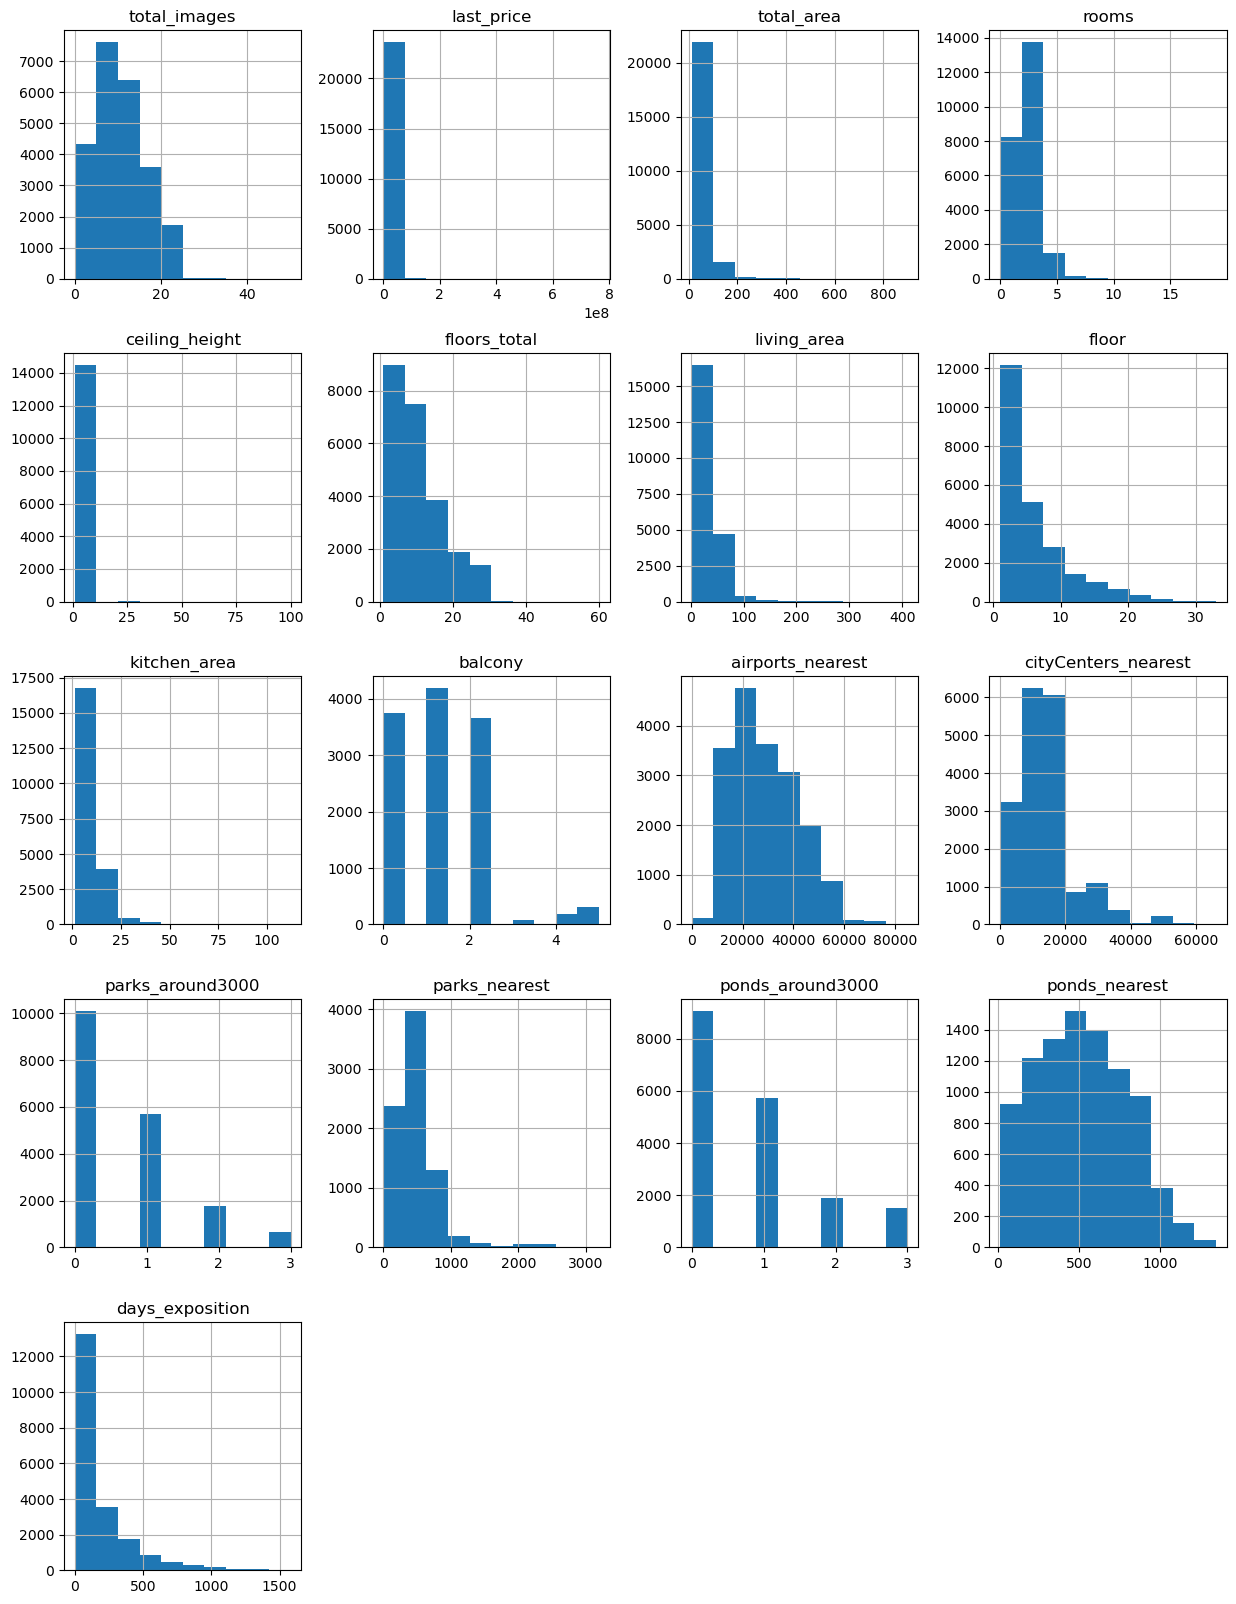

In [4]:
data.hist(figsize=(15, 20));

По гистограмме `days_exposition` можно понять что некоторые объявления снимали с продажи в прямо в день публикации. Интересно находились ли так быстро покупатели или же объявления снимали с продажи по другой причине

Сейчас подробнее посмотрим на все данные и странные аномалии

### Выполните предобработку данных

В этом разделе мы уберем ненужные пропуски и аномальные значения, изменим типы данных где это нужно и восстановим нужные нам значения.

Чтобы было удобнее еще раз напишем описание данных:

*Описание данных*
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

#### Удаление пропусков

In [5]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Видно большое количество пропусков. Больше всего пропусков там, где значения заполнялись автоматически.
- можем заменить значение NaN на нули в столбце `balcony` (количество балконов)
- можем заменить значение NaN на нули в столбце `parks_around3000` (парки в радиусе 3м),потому что их может не быть в этом радиусе
- можем заменить значение NaN на нули в столбце `ponds_around3000` (водоемы в радиусе 3м),потому что их может не быть в этом радиусе


In [7]:
data['balcony'].fillna(0,inplace=True)
data['parks_around3000'].fillna(0,inplace=True)
data['ponds_around3000'].fillna(0,inplace=True)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Мы можем заполнить пропуски в столбце`ceiling_height` медианным значением  из столбца ceiling_height


In [8]:
data['ceiling_height'].fillna(data['ceiling_height'].median(),inplace=True)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


На общее количество этажей влияет этаж квартиры, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца floor.

In [9]:
for t in data['floor'].unique():
    data.loc[(data['floor'] == t) & (data['floors_total'].isna()), 'floors_total'] = data.loc[(data['floor'] == t), 'floors_total'].median()
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Удалим строчки, где не указан город. Мы не заем где находятся эти квартиры, поэтому лучше избавятся от этих данных

In [10]:
data = data.dropna(subset=['locality_name']).copy() #  я использовала метод  copy чтобы избежать ошибки

Большая часть пропусков во второй части, где данные получены автоматически на основе картографических данных.

Фотографии и некоторые факты про квартиру могут отсутствовать это абсолютно нормально, потому что данные были взяты из архивов объявлений о продаже квартир.

в `is_apartment` неправильно указан тип данных.

####   Изменение типов данных

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        23650 non-null  float64
 6   floors_total          23650 non-null  float64
 7   living_area           21752 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          2760 non-null   object 
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          21381 non-null  float64
 13  balcony               23650 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest      18

is_apartment — апартаменты (булев тип) 

floors_total, balcony, parks_around3000,ponds_around3000  - может быть только типом int, так как, к примеру, не может быть полтора балкона или полтора парка

In [12]:
data.loc[:,'is_apartment'] = data.loc[:,'is_apartment'].astype('bool')
data.loc[:,'floors_total'] = data.loc[:,'floors_total'].astype('int')
data.loc[:,'balcony'] = data.loc[:,'balcony'].astype('int')
data.loc[:,'parks_around3000'] = data.loc[:,'parks_around3000'].astype('int')
data.loc[:,'ponds_around3000'] = data.loc[:,'ponds_around3000'].astype('int')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,True,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,True,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,True,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,True,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,True,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [13]:
data['is_apartment'] = (data['is_apartment'].replace(True,1).replace(False,0))
data['studio'] = (data['studio'].replace(True,1).replace(False,0))
data['open_plan'] = (data['open_plan'].replace(True,1).replace(False,0))
data.head(1)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,1,0,0,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN


Изменим типы Bool с True False на 1 и 0

#### Обработка дубликатов

In [14]:
data['locality_name'] = data['locality_name'].str.lower()


In [15]:
data['locality_name'] = (data['locality_name'].str.replace('ё', 'е')
    .replace(['поселок городского типа', 'посёлок городского типа','городской поселок','коттеджный поселок'], 
             'поселок', regex=True)) 
        
set(data['locality_name'])

{'бокситогорск',
 'волосово',
 'волхов',
 'всеволожск',
 'выборг',
 'высоцк',
 'гатчина',
 'деревня агалатово',
 'деревня аро',
 'деревня батово',
 'деревня бегуницы',
 'деревня белогорка',
 'деревня большая вруда',
 'деревня большая пустомержа',
 'деревня большие колпаны',
 'деревня большое рейзино',
 'деревня большой сабск',
 'деревня бор',
 'деревня борисова грива',
 'деревня ваганово',
 'деревня вартемяги',
 'деревня вахнова кара',
 'деревня выскатка',
 'деревня гарболово',
 'деревня глинка',
 'деревня горбунки',
 'деревня гостилицы',
 'деревня заклинье',
 'деревня заневка',
 'деревня зимитицы',
 'деревня извара',
 'деревня иссад',
 'деревня калитино',
 'деревня кальтино',
 'деревня камышовка',
 'деревня каськово',
 'деревня келози',
 'деревня кипень',
 'деревня кисельня',
 'деревня колтуши',
 'деревня коркино',
 'деревня котлы',
 'деревня кривко',
 'деревня кудрово',
 'деревня кузьмолово',
 'деревня курковицы',
 'деревня куровицы',
 'деревня куттузи',
 'деревня лаврики',
 'деревня

In [16]:
data.duplicated().sum()

0

**Вывод:**
- Зафиксировали большое количество пропусков. Больше всего пропусков там, где значения заполнялись автоматически.
- Заменили можем заменить значение NaN на нули в столбце balcony, parks_around3000, ponds_around3000
- На общее количество этажей влияет этаж квартиры, поэтому заполнили пропуски в этом столбце на медианное значение по каждому типу из столбца floor.
- Удалили строчки, где не указан город
- Изменили типы данных у некоторых столбцов
- Изменили типы Bool с True False на 1 и 0
- Избавились от дубликатов locality_name 


### Добавьте в таблицу новые столбцы

1. цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой);
2. день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
3. месяц публикации объявления;
4. год публикации объявления;
5. тип этажа квартиры (значения — «‎первый», «последний», «другой»);
6. расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений).

In [17]:
data['price_one_square_meter'] = round(data['last_price']/data['total_area'],2)
data.head(1)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_meter
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.7,16.0,51.0,8,1,0,0,25.0,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37


Чтобы продолжить делать столбцы с датой, надо перевести ее в читаемый вид

In [18]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [19]:
data['day_of_publication'] = pd.DatetimeIndex(data['first_day_exposition']).weekday # день недели
data['month_of_publication'] = pd.DatetimeIndex(data['first_day_exposition']).month # месяц
data['year_of_publication'] = pd.DatetimeIndex(data['first_day_exposition']).year # год

In [20]:
#тип этажа квартиры (значения — «первый», «последний», «другой»);
for i in data['floors_total']: #прогоняем через столбец с общим числом этажей
    def type_of_floor(t):
        if t == 1:
            return 'первый'
        if i == t:
                return 'последний'
        else:
            return 'другой'
data['floor_category'] = data['floor'].apply(type_of_floor)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_meter,day_of_publication,month_of_publication,year_of_publication,floor_category
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,1,0,0,25.0,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,1,0,0,11.0,2.0,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,1,0,0,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,1,0,0,NaN,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,1,0,0,41.0,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой


In [21]:
#расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений).
data['cityCenters_nearest_kilometers'] = round(data['cityCenters_nearest']/1000)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23650 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   total_images                    23650 non-null  int64         
 1   last_price                      23650 non-null  float64       
 2   total_area                      23650 non-null  float64       
 3   first_day_exposition            23650 non-null  datetime64[ns]
 4   rooms                           23650 non-null  int64         
 5   ceiling_height                  23650 non-null  float64       
 6   floors_total                    23650 non-null  float64       
 7   living_area                     21752 non-null  float64       
 8   floor                           23650 non-null  int64         
 9   is_apartment                    23650 non-null  int64         
 10  studio                          23650 non-null  int64         
 11  open_pl

## Проведите исследовательский анализ данных

Список параметров:
- общая площадь - `total_area`
- жилая площадь - `living_area`
- площадь кухни - `kitchen_area`
- цена объекта - `last_price`
- количество комнат - `rooms`
- высота потолков - `ceiling_height`
- тип этажа квартиры («первый», «последний», «другой») - `floor_category`
- общее количество этажей в доме - `floors_total`
- расстояние до центра города в метрах - `cityCenters_nearest`
- расстояние до ближайшего парка - `parks_nearest`

Для каждого из этих столбцов сделаем гистограммы и диаграммы размаха. Учтем все значения и если надо уберем "хвосты", так же посмотрим аномалии

#### общая площадь

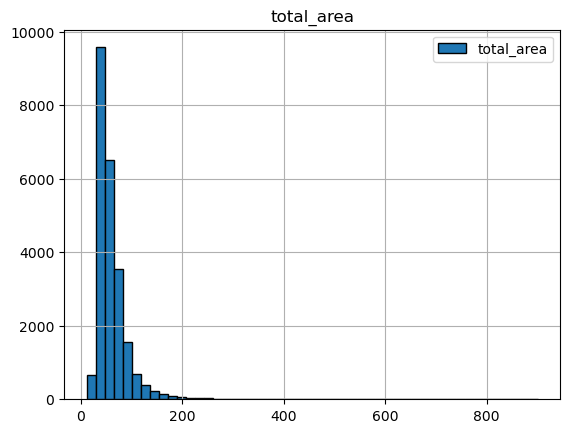

In [23]:
data.hist('total_area',bins = 50,ec='black', legend=True);

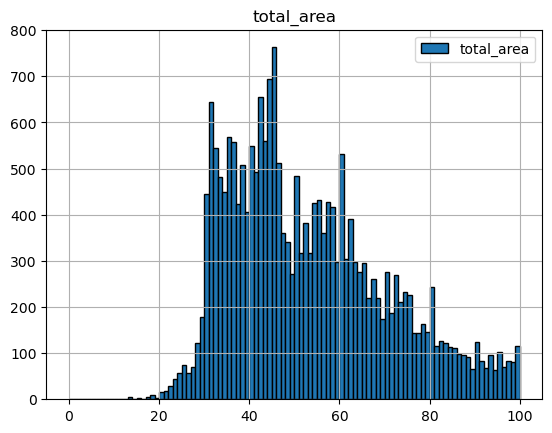

In [24]:
data.hist('total_area',bins = 100, range = (0,100),ec='black', legend=True);

По гистограмме видно, что чаще всего квартиры общей площадью от ~ 35 до 52 кв.м, но у нас есть значения и больше этих значений, сделаем гистограмму размаха

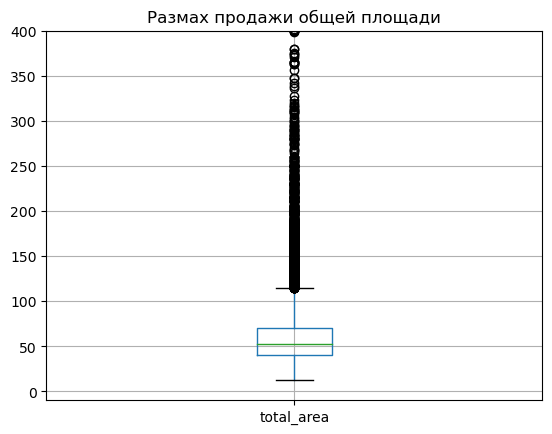

In [25]:
data.boxplot(column='total_area')
plt.title('Размах продажи общей площади');
plt.ylim(-10,400);

Видим пару значений выбивающихся из общей массы в районе 600 и 900. Мы нашли аномальные значения. Посмотрим сколько их всего для этого сделаем условия по значениям > 400

<div class="alert alert-success">

**Артём:** 👍 Согласен.

In [26]:
len(data.query('total_area > 400')),len(data.query('total_area > 600'))/ len(data) #в процентах

(23, 0.00016913319238900633)

Можем спокойно удалять эти аномальные значения, поскольку их всего 0.1%, а в процентом соотношении они вообще не играют роли

In [27]:
data_new = data.query('total_area < 400')
#print(len(data.query('total_area > 600')))

*Мы избавились от аномальных значений*

Посмотрим на хвосты

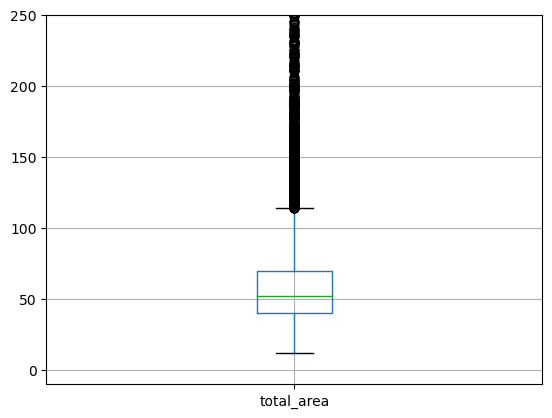

In [28]:
data_new.boxplot(column='total_area');
plt.ylim(-10,250);

Видим что ниэний ус упирается в 12, а верхний в 114. Видим большой выброс значений больше 114

In [29]:
data_new['total_area'].describe()

count    23624.000000
mean        59.849454
std         32.423467
min         12.000000
25%         40.000000
50%         52.000000
75%         69.600000
max        399.000000
Name: total_area, dtype: float64

Медиана не намного меньше чем среднее - это хорошо. Значит выбивающихся значений не так и много. Проверим

In [30]:
len(data_new.query('total_area>114')), len(data_new.query('total_area>114'))/len(data)

(1224, 0.051754756871035944)

В процентном соотношении они составляют  5% от общих данных

*Вывод: Мы избавились от аномальных значений больше 400 кв.м и так же нашли хвост, который включал квартиры у которых квадратных метров было >114. чаще всего квартиры общей площадью от ~ 35 до 52 кв.м Медиана = 52, среднее 59.8*

##### жилая площадь

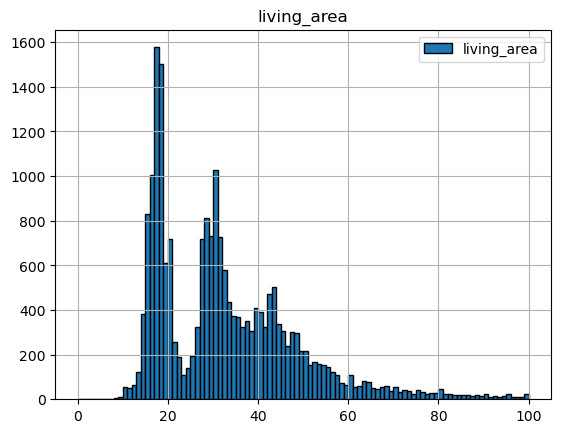

In [31]:
data.hist('living_area',bins = 100, range = (0,100),ec='black', legend=True);

Чаще всего жилая площадь составляет 30 кв.м., так же есть всплеск в районе 18-19 кв.м. , скорей всего данные делятся на жилую площадь, где общая площдь в районе 50 кв.м. и больше 50 кв.м.

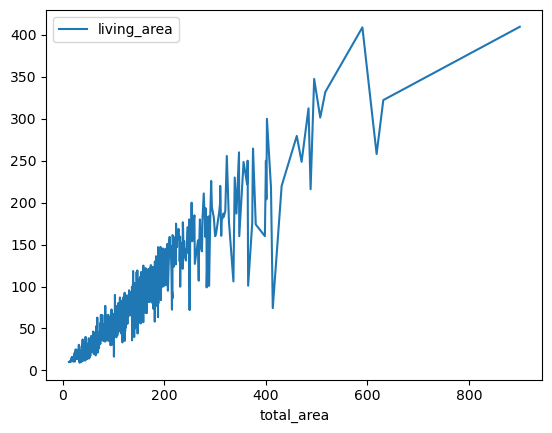

In [32]:
local_and_living = data.pivot_table(index = 'total_area',values = 'living_area')
local_and_living.plot();

Да, теория оказалась правдой. Жилая площадь напрямую зависит от общей площади квартиры.

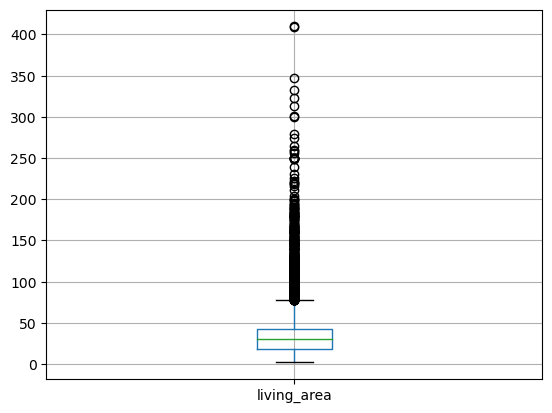

In [33]:
data.boxplot('living_area');

Видим, что первый хвост упирается в 2, а верхний в 72. Хвост большой есть отстраненное значение больше 400. Посмотрим описание и посмотрим сколько значений больше 72 в процентном соотношении

In [34]:
data['living_area'].describe()

count    21752.000000
mean        34.448356
std         22.037664
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Медиана не намного меньше чем среднее - это хорошо. Значит выбивающихся значений не так и много. Проверим 

In [35]:
len(data.query('living_area>72')),len(data.query('living_area>72'))/len(data)

(953, 0.04029598308668076)

Выброс составляет 4% от общих данных

Видим пару значений выбивающихся из общей массы в районе примерно от 300 до 400. Мы нашли аномальные значения. Посмотрим сколько их всего для этого сделаем условия по значениям > 300

In [36]:
len(data.query('living_area>300')),len(data.query('living_area>300'))/len(data_new)

(7, 0.0002963088384693532)

Таких значений 7, так что можем спокойно их убрать

In [37]:
data_new = data.query('not living_area>300')


*Вывод: Мы нашли хвоста и избавились от выбивающихся значений,так как их было 7 так же посмотрели зависимость между общей и жилой площадью. Чаще всего жилая площадь составляет 30 кв.м., так же есть всплеск в районе 18-19 кв.м,  Медиана = 30, среднее = 34.4*

#### площадь кухни

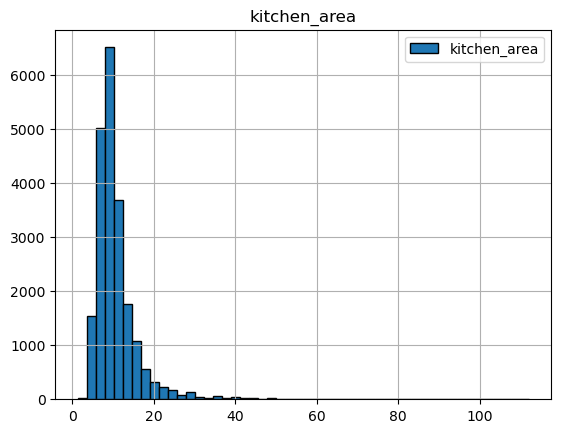

In [38]:
data.hist('kitchen_area',bins = 50,ec='black', legend=True);

Обычное значение площади кухни варьируется от 5 до 12 кв. м. Видим,что значения стремятся к 0 после 40. Так же хочется изучить взимосвязь между площадью кухни и общей площадью(хоть по графику прямых разбиений не видно)

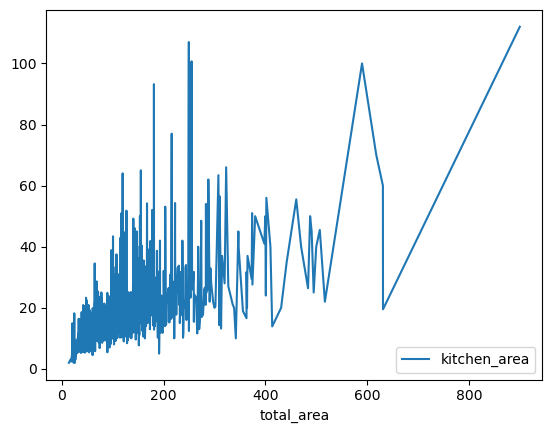

In [39]:
kitchen_and_total = data.pivot_table(index = 'total_area',values = 'kitchen_area')
kitchen_and_total.plot();

Площадь кухни так же и жилая площадь зависит от общей площади квартиры, а зависит ли она от жилой площади?

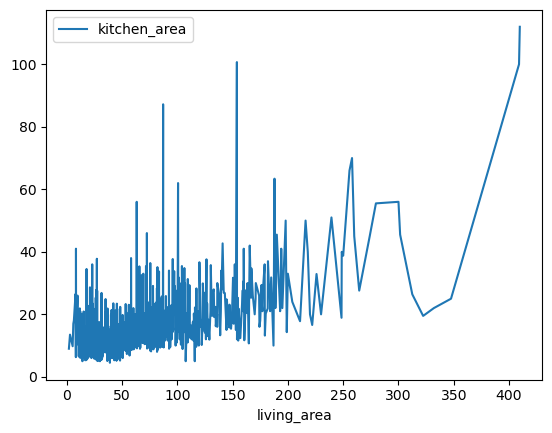

In [40]:
kitchen_and_living = data.pivot_table(index = 'living_area',values = 'kitchen_area')
kitchen_and_living.plot();

Судя по графику площадь кухни не записит от жилой площади

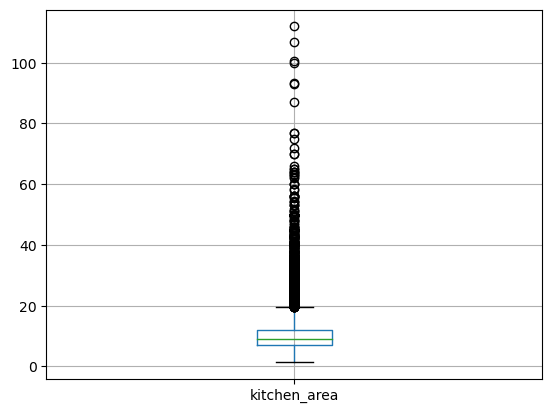

In [41]:
data.boxplot('kitchen_area');
#plt.ylim(0,17.2)

Видим длинный хвост. Нижний ус упирается в 1 а верхний в 17.2. Посмотрим данные в методе describe и далее посмотрим на процентное соотношения значения >17.2 к общей массе

In [42]:
data['kitchen_area'].describe()

count    21381.000000
mean        10.566403
std          5.901753
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Медиана не намного меньше чем среднее - это хорошо. Значит выбивающихся значений не так и много. Проверим 

In [43]:
len(data.query('kitchen_area>17.2')),len(data.query('kitchen_area>17.2'))/len(data)

(1617, 0.06837209302325581)

Мы можем увидеть значения выбивающиеся из массы, такие значения >80, посмотрим сколько их 

In [44]:
len(data.query('kitchen_area>80')),len(data.query('kitchen_area>80'))/len(data)

(7, 0.0002959830866807611)

Их 7 - Можем удалять значения

In [45]:
data_new = data_new.query('not kitchen_area>80')


*Вывод: Установили, что размер кухни зависит от общего размера квартиры, но при этом не зависит от жилой площади помещения. Так же нашли хвост и удалили выбивающиеся значения. Чаще всего площадь кухни от 5 до 12 кв. м, Медиана = 9, среднее 10,5*

#### цена объекта 

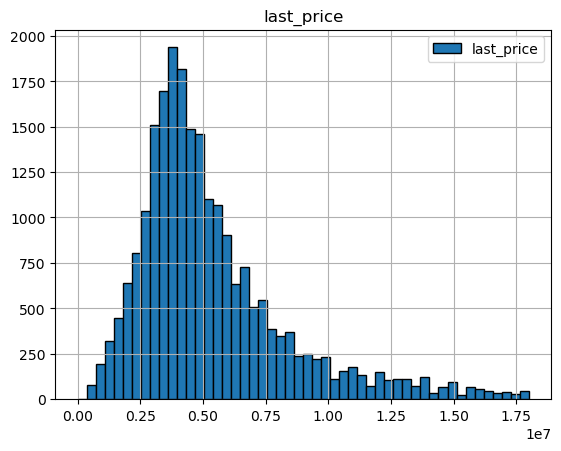

In [46]:
data.hist('last_price',bins = 50,range = (0,18000000),ec='black', legend=True);
#data['last_price'].max()

Обычная стоимость квартиры вальируется от 3х до 5 млн. Очень редко бывают значения больше 18 млн.

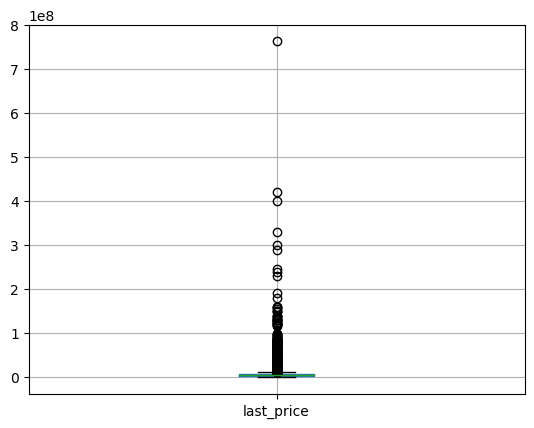

In [47]:
data.boxplot('last_price');
#plt.ylim(0,4000000)

Считаем, что хвост - значения больше 12 млн. Посмотрим медиану и среднее значение

In [48]:
data['last_price'].describe()

count    2.365000e+04
mean     6.541127e+06
std      1.089640e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [49]:
max(data['last_price'])

763000000.0

Максимальное значение - аномально, скорее всего человек нечаянно вписал два нуля, нужно посмотреть строчку

In [50]:
data.query('last_price == 763000000.0')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_meter,day_of_publication,month_of_publication,year_of_publication,floor_category,cityCenters_nearest_kilometers
12971,19,763000000.0,400.0,2017-09-30,7,2.65,10.0,250.0,10,1,0,0,NaN,2.0,санкт-петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0,1907500.0,5,9,2017,другой,4.0


Видим,что сама по себе строка аномальная квадратура 400, 7 комнат, можем считать это не ошибкой ввода, а выбросом

In [51]:
len(data.query('last_price>12000000')),len(data.query('last_price>12000000'))/len(data)

(1936, 0.08186046511627906)

Мы нали хвост, но отрежем исключительно большие значения >100000000

In [52]:
len(data.query('last_price>100000000')),len(data.query('last_price>100000000'))/len(data)

(37, 0.0015644820295983087)

Всего 37 значений, можем удалять

In [53]:
data_new = data_new.query('not last_price>100000000')

*Вывод: Медиана 4,65 млн,среднее =6.54 млн  Обычная цена квартиры вальируется от 3х до 5 млн. Очень редко бывают значения больше 30 млн. Мы отрезали аномальные значения, потому что их доля была примерно 0.1%*

#### количество комнат

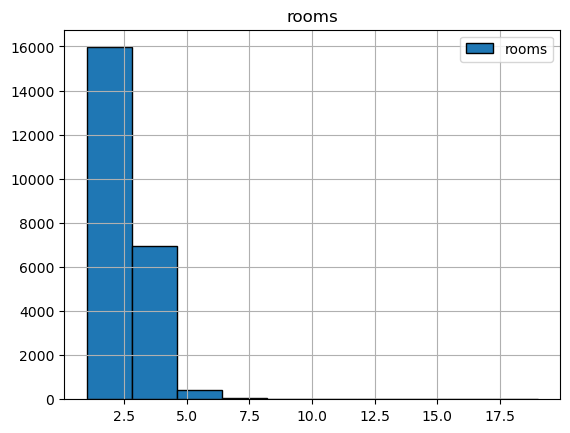

In [54]:
data.hist('rooms',bins = 10,range = (1,19), ec='black', legend=True);

Чаще всего в квартирах 2 комнаты

In [55]:
data['rooms'].describe()

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Странное максимальное значение 19 комнат, так же есть квартиры без комнат - это скорей всего квартиры студии или квартиры со свободной планировкой

In [56]:
data.query('rooms == 0').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_meter,day_of_publication,month_of_publication,year_of_publication,floor_category,cityCenters_nearest_kilometers
144,1,2450000.0,27.00,2017-03-30,0,2.65,24.0,15.50,2,1,1,0,NaN,2.0,поселок мурино,NaN,NaN,0.0,NaN,0.0,NaN,181.0,90740.74,3,3,2017,другой,NaN
349,4,2320000.0,25.00,2017-09-27,0,2.65,14.0,17.00,1,1,0,1,NaN,0.0,деревня кудрово,NaN,NaN,0.0,NaN,0.0,NaN,45.0,92800.00,2,9,2017,первый,NaN
440,8,2480000.0,27.11,2018-03-12,0,2.65,17.0,24.75,4,1,1,0,NaN,2.0,санкт-петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0,91479.16,0,3,2018,другой,15.0
508,0,3375000.0,34.40,2017-03-28,0,2.65,26.0,24.30,19,1,0,1,NaN,1.0,поселок парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0,98110.47,1,3,2017,другой,19.0
608,2,1850000.0,25.00,2019-02-20,0,2.65,10.0,NaN,7,1,1,0,NaN,0.0,поселок шушары,NaN,NaN,0.0,NaN,0.0,NaN,29.0,74000.00,2,2,2019,другой,NaN


Да, предположение верно, поэтому квартиры с отутствием комнат - это абсолютно нормально

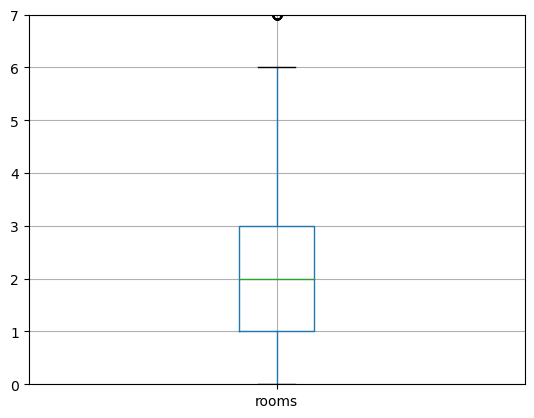

In [57]:
data.boxplot('rooms');
plt.ylim(0,7);

Небольшой выброс есть начинается с 7 комнат. Посмоотрим в процентах и если нас устроит запишем в новый датафрем без хвоста

In [58]:
len(data.query('rooms>7')),len(data.query('rooms>7'))/len(data)

(31, 0.0013107822410147992)

In [59]:
data_new = data_new.query('rooms<7')

*Вывод: Записали в новый датафрейм значения без выбросов, потому что их процент был чуть больше 0,1 %, поняли что квартиры могут быть без комнат. Чаще всего в квартирах 2 комнаты, среднее 2 и медиана 2*

#### высота потолков

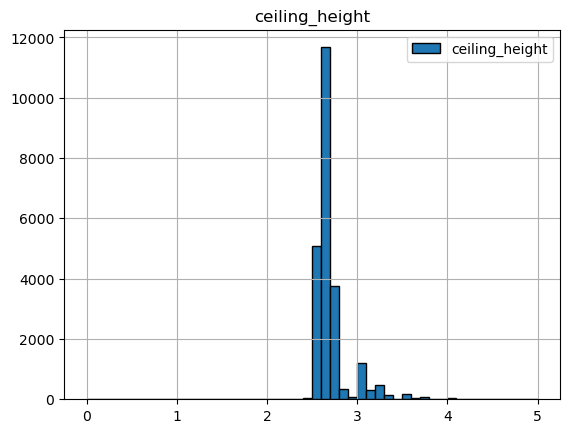

In [60]:
data.hist('ceiling_height',bins = 50,range = (0,5),ec='black', legend=True);

обычная высота потолка от 2.5 метра

In [61]:
data['ceiling_height'].describe()

count    23650.000000
mean         2.724311
std          0.989255
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Мы увидели странное число. Высота потолка не может быть 100 метров, возможно человек забыл поставить запятую, посмотрим сколько таких значений

In [62]:
data.query('ceiling_height == 100')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_meter,day_of_publication,month_of_publication,year_of_publication,floor_category,cityCenters_nearest_kilometers
22869,0,15000000.0,25.0,2018-07-25,1,100.0,5.0,14.0,5,1,0,0,11.0,5.0,санкт-петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0,600000.0,2,7,2018,последний,8.0


Странная квартира с 0 фотографий и с 100 метровым потолком, можем ее удалить(Сделаем это чуть позже), чтобы никто не узнал что это за таинственная квартира

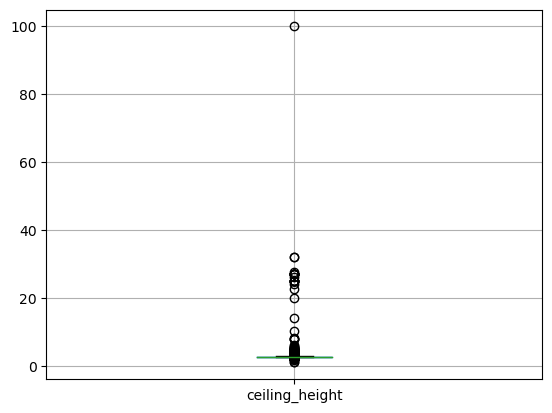

In [63]:
data.boxplot('ceiling_height');

Судя по диаграмме рахмаха, значений больше 2.5 очень много, но что если в промежутке от 25 до 40, люди просто забыли поставить запятую, попробуем это исправить. Меньше значения брать нельзя, так как потолки не могут быть 1 или 2 метра.

In [64]:
data.loc[(data['ceiling_height'] >= 25), 'ceiling_height'] *= 0.1
#data.query('ceiling_height>25')

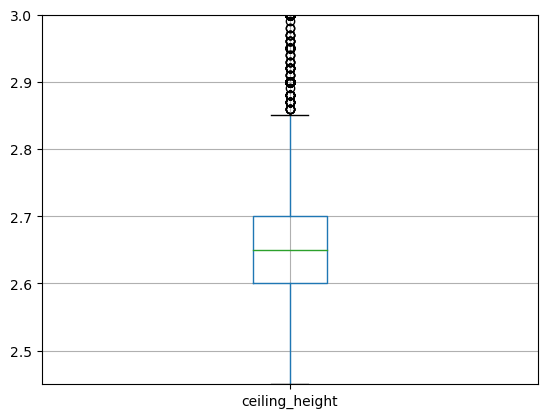

In [65]:
data.boxplot('ceiling_height');
plt.ylim(2.45,3);

Есть 2 хвоста 1 начинается с 2.45, а второй начинается в рафоне 2.85. Нижний хвост авбсолютно логичен, потолки не могет быть меньше 2х метров, потому что 2х метровые люди туда бы и не зашли, а вот с верхним хвостом я бы поспорила, потолки сейчас бывают и до 3,1 метра и такие потолки обычно делают в квартирах бизнесс класса

In [66]:
len(data.query('ceiling_height<2.45')),len(data.query('ceiling_height<2.45'))/len(data), len(data.query('ceiling_height>3')),len(data.query('ceiling_height>3'))/len(data)

(44, 0.0018604651162790699, 1508, 0.0637632135306554)

Нижний ус можем удалять, т.к он составляет 0,1 процент от общего колчиества, а верхний не стоит, т.к. он составляет 6%

In [67]:
data_new = data_new.query('ceiling_height>2.45')

*Вывод: Мы избавились от хвоста и исправили аномальные значения. Чаще всего в домах потолки 2,6 метра. Среднее 2.7 и медиана 2.6*

#### тип этажа квартиры

In [68]:
data['floor_category'].value_counts()

floor_category
другой       18122
первый        2912
последний     2616
Name: count, dtype: int64

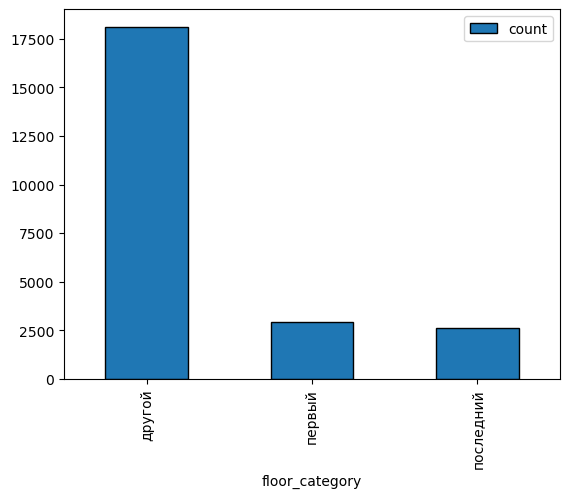

In [69]:
data['floor_category'].value_counts().plot.bar(ec='black', legend=True);

*Вывод: Видно, что объекты недвижимости, расположенные на первом и последним этажах имеют примерно одинаковые значения и их доля не столь велика. В основном объекты расположены на этажах между первым и последним.*

#### общее количество этажей в доме

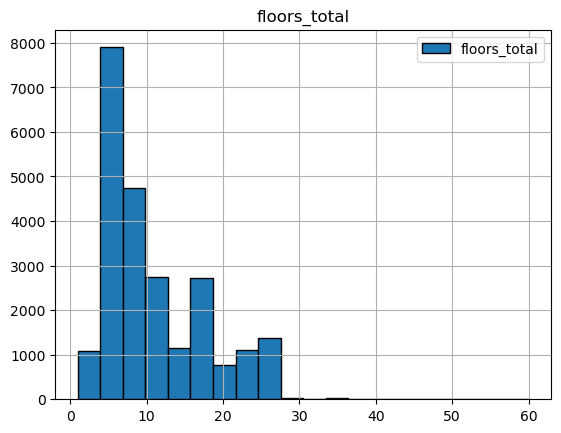

In [70]:
data.hist('floors_total',bins = 20,ec='black', legend=True);

Чаще всего продают квартиры, которые находятся на 5ом этаже.

In [71]:
data['floors_total'].describe()

count    23650.000000
mean        10.684059
std          6.597081
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

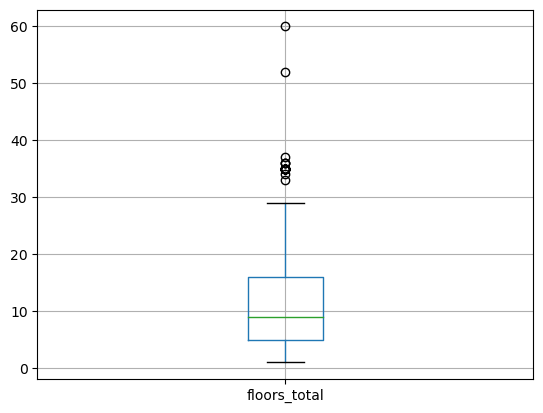

In [72]:
data.boxplot('floors_total');
#plt.ylim(2.45,3)

Есть выброс после 30 этажа, посмотри сколько там значений

In [73]:
len(data_new.query('floors_total>30')),len(data_new.query('floors_total>30'))/len(data)

(31, 0.0013107822410147992)

In [74]:
data_new = data_new.query('floors_total<30')

*Вывод: Большинство людей живут на 5ом этаже. Остальные варианты представлены реже. Среднее 5 и медиана 9*

#### расстояние до центра города в метрах

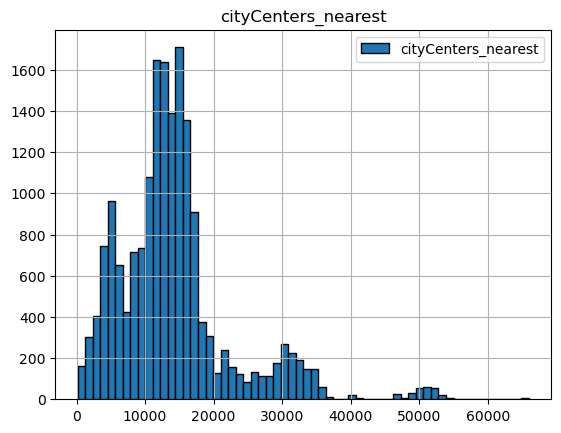

In [75]:
data.hist('cityCenters_nearest',bins = 60,ec='black', legend=True);

In [76]:
data['cityCenters_nearest'].describe()

count    18139.000000
mean     14197.860742
std       8606.830295
min        181.000000
25%       9241.000000
50%      13105.000000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

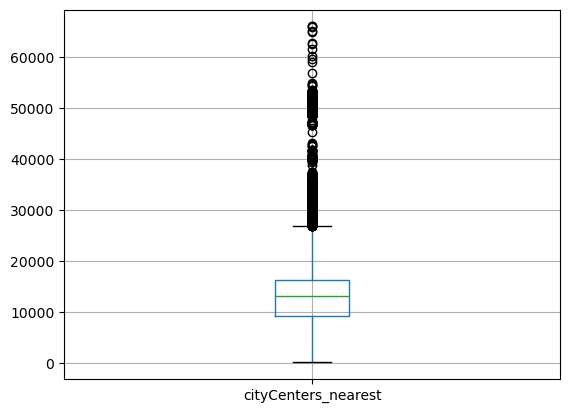

In [77]:
data.boxplot('cityCenters_nearest');
#plt.ylim(2.45,3)

*Вывод: Большинство объектов недвижимости расположены на удалении 13-14 км от центра. Остальные варианты представлены реже. Среднее 13,9 км и медиана 13 км*

#### расстояние до ближайшего парка

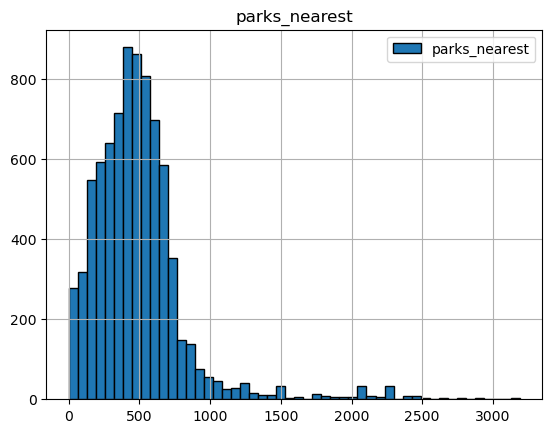

In [78]:
data.hist('parks_nearest',bins = 50,ec='black', legend=True);

Чаще всего расстояние до ближайщего парка 400-500 м

In [79]:
data['parks_nearest'].describe()

count    8064.000000
mean      490.830729
std       342.554386
min         1.000000
25%       288.000000
50%       454.500000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

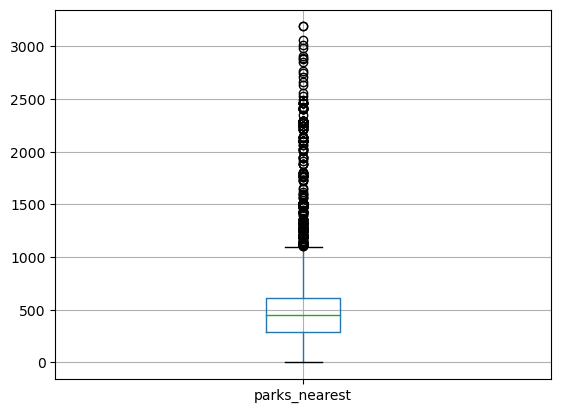

In [80]:
data.boxplot('parks_nearest');

*Вывод: Большинство объектов недвижимости расположены на удалении от ближайшего парка на расстоянии 400-600м. Ближайшие к парку объект на расстоянии 500м. Среднее 490м и медиана 454м*

In [81]:
len(data_new)/len(data)# проверка, что удаленных не >10%

0.990909090909091

**Вывод**

Мы создали новый датаврейм `data_new`, в котором убрали почти все ненужные хвосты
Расчитали процент выбросов от основной массы
Избавились от аномальных значений
1. Общая площадь
Мы избавились от аномальных значений больше 400 кв.м и так же нашли хвост, который включал квартиры у которых квадратных метров было >114. чаще всего квартиры общей площадью от ~ 35 до 52 кв.м Медиана = 52, среднее 59.8
2. Жилая площадь
Мы нашли хвоста и избавились от выбивающихся значений,так как их было 7 так же посмотрели зависимость между общей и жилой площадью. Чаще всего жилая площадь составляет 30 кв.м., так же есть всплеск в районе 18-19 кв.м, Медиана = 30, среднее = 34.4
3. Площадь кухни
Установили, что размер кухни зависит от общего размера квартиры, но при этом не зависит от жилой площади помещения. Так же нашли хвост и удалили выбивающиеся значения. Чаще всего площадь кухни от 5 до 12 кв. м, Медиана = 9, среднее 10,5
4. Цена объекта
Медиана 4,65 млн,среднее =6.54 млн Обычная цена квартиры вальируется от 3х до 5 млн. Очень редко бывают значения больше 30 млн. Мы отрезали аномальные значения, потому что их доля была примерно 0.1%
5. Количество комнат
Мы проанализировали, что квартиры могут быть без комнат. Чаще всего в квартирах 2 комнаты, среднее 2 и медиана 2
6. Высота потолков
Мы избавились от хвоста и исправили аномальные значения. Чаще всего в домах потолки 2,6 метра. Среднее 2.7 и медиана 2.6
7. Тип этажа квартиры
Видно, что объекты недвижимости, расположенные на первом и последним этажах имеют примерно одинаковые значения и их доля не столь велика. В основном объекты расположены на этажах между первым и последним.
8. Общее количество этажей в доме
Большинство людей живут на 5ом этаже. Остальные варианты представлены реже. Среднее 5 и медиана 9
9. Расстояние до центра города в метрах
Большинство объектов недвижимости расположены на удалении 13-14 км от центра. Остальные варианты представлены реже. Среднее 13,9 км и медиана 13 км
10. Расстояние до ближайшего парка
Большинство объектов недвижимости расположены на удалении от ближайшего парка на расстоянии 400-600м. Ближайшие к парку объект на расстоянии 500м. Среднее 490м и медиана 454м


###  Изучите, как быстро продавались квартиры (столбец days_exposition)

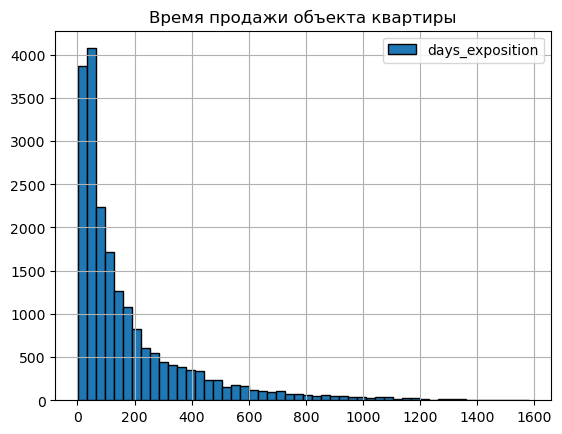

In [82]:
data_new['days_exposition'].hist(bins = 50,ec='black', legend=True);
plt.title('Время продажи объекта квартиры');

По гистограмме видим, что очень много значений от 0 до 180, а значения стремятся к нулю начиная с 1410.

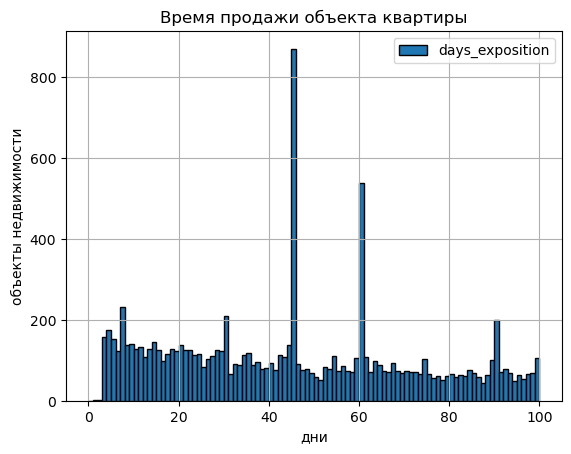

In [83]:
data_new['days_exposition'].hist(bins=100, range=(0, 100), ec='black', legend=True);
plt.title('Время продажи объекта квартиры');
plt.xlabel('дни');
plt.ylabel('объекты недвижимости');

Чаще всего квартиры покупают за 45 - 60 дней. Но объявления могли висеть на сайте и после покупки квартиры, поэтому стоит по подробнее посмотреть на данные

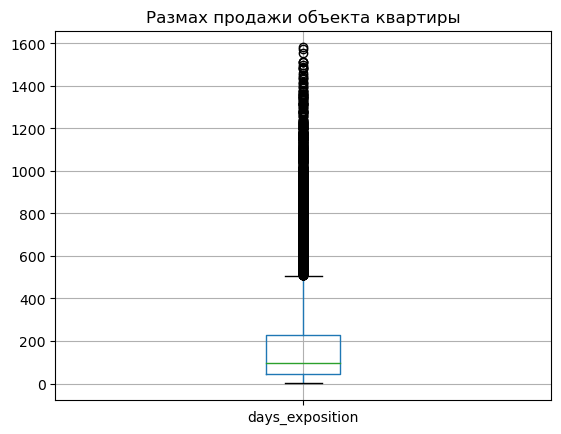

In [84]:
data_new.boxplot(column='days_exposition');
plt.title('Размах продажи объекта квартиры');

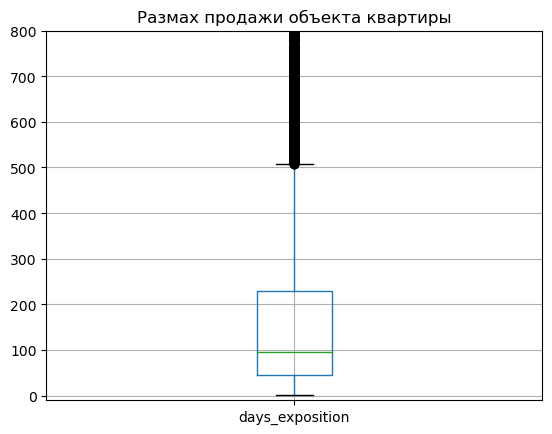

In [85]:
data_new.boxplot(column='days_exposition');
plt.title('Размах продажи объекта квартиры');
plt.ylim(-10,800);

Нижний «ус» упирается в 0, минимальное значение. Верхний заканчивается около 510 дней. Все что выше считается выбросами.Сейчас посмотрим по подробнее по квартилям

In [86]:
data_new['days_exposition'].describe()

count    20303.000000
mean       180.301532
std        219.440296
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

 Видим очень большое стандартное отклонение - это значит, что значения в выборке отличаются от среднего арифметического на 219.777916
 
 При этом медиана примерно в 2 раза меньше, чем среднее арифметическое, выброс точно есть.

Для начала посчитаем сколько в процентном соотношении дней больше 510, чтобы понять можно ли избавится от хвоста

In [87]:
len(data_new.query('days_exposition > 510')) / len(data)

0.06997885835095137

верхний хвост составляет от всех данных всего 4% можем с ним попрощаться

In [88]:
data_new = data_new.query('not days_exposition > 510')
data_new['days_exposition'].describe()

count    18648.000000
mean       128.129826
std        120.991620
min          1.000000
25%         41.000000
50%         85.000000
75%        182.000000
max        510.000000
Name: days_exposition, dtype: float64

In [89]:
len(data_new)/len(data)

0.9209302325581395

**Вывод: Мы избавились от хвоста, который составлял 7% от данных.
При этом сделали вывод, что быстрая продажа - до 45 дней, а медленная от 182 до 510 дней**

Пометка:взяла нижнее значения с запасом по предыдущему описанию(с хвостом), а верхние значения по новому описанию(без хвоста)

 ### Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта

Построены графики, которые показывают зависимость цены от параметров:
  - общая площадь; `total_area`
  - жилая площадь; `living_area`
  - площадь кухни; `kitchen_area`
  - количество комнат;`rooms`
  - тип этажа, на котором расположена квартира (первый, последний, другой);`floor_category`
  - дата размещения (день недели, месяц, год).`day_of_publication,month_of_publication,year_of_publication`

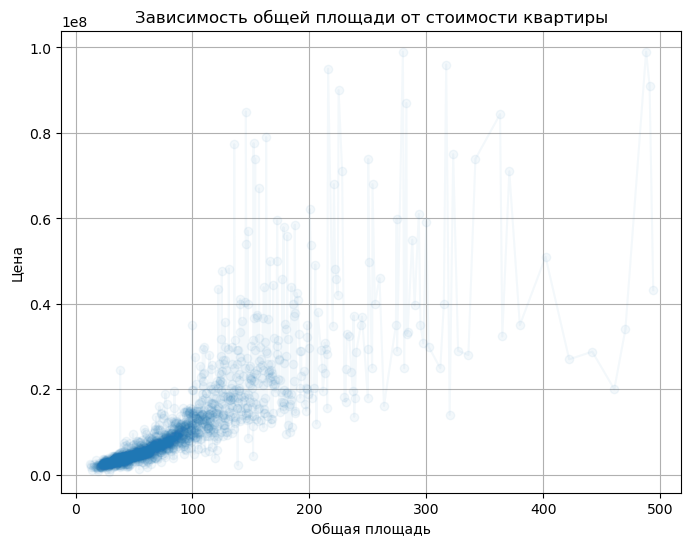

In [90]:
data_new.pivot_table(index = 'total_area',
                     values = 'last_price').plot(marker = 'o',grid=True, figsize=(8, 6), alpha = 0.05, legend=False);
plt.title('Зависимость общей площади от стоимости квартиры');
plt.xlabel('Общая площадь');
plt.ylabel('Цена');

Исходя из графика, мы видим прямую зависимость между общей площадью и ценой. Чем больше общая площадь тем выше цена.

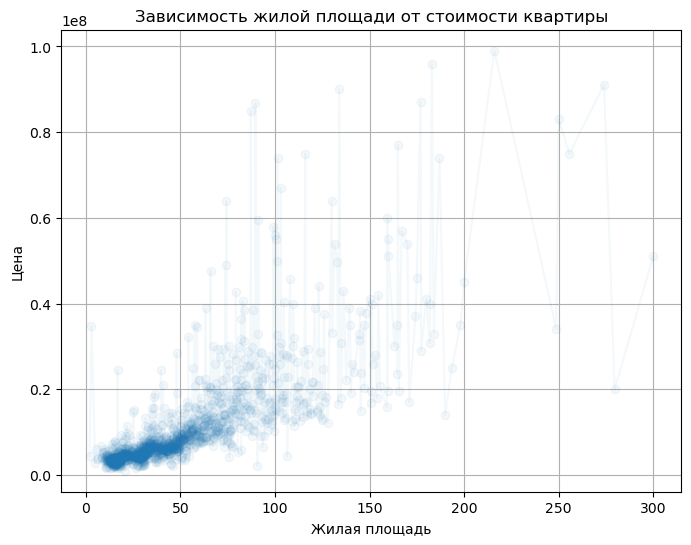

In [91]:
data_new.pivot_table(index = 'living_area',
                     values = 'last_price').plot(marker = 'o',grid=True, figsize=(8, 6), alpha = 0.05, legend=False);
plt.title('Зависимость жилой площади от стоимости квартиры');
plt.xlabel('Жилая площадь');
plt.ylabel('Цена');

Исходя из графика, мы видим прямую зависимость между жилой площадью и ценой. Чем больше жилая площадь тем выше цена.

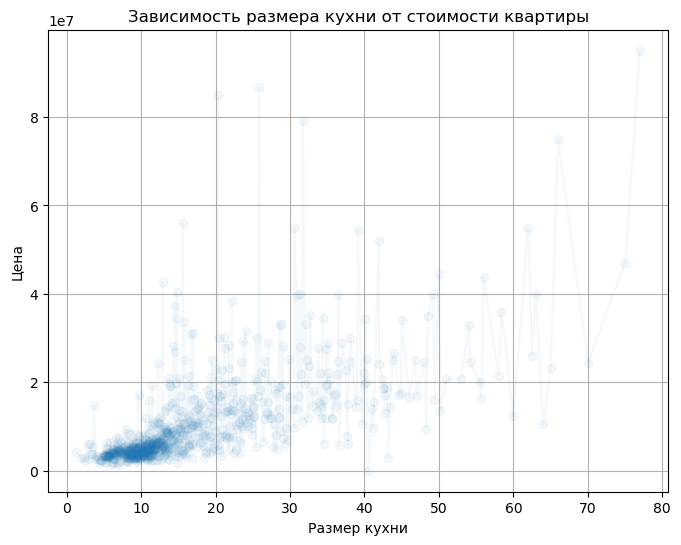

In [92]:
data_new.pivot_table(index = 'kitchen_area',
                     values = 'last_price').plot(marker = 'o',grid=True, figsize=(8, 6), alpha = 0.05, legend=False);
plt.title('Зависимость размера кухни от стоимости квартиры');
plt.xlabel('Размер кухни');
plt.ylabel('Цена');

Зависимость прямопропорциональная - чем больше площадь кухни, тем выше ее стоимость.

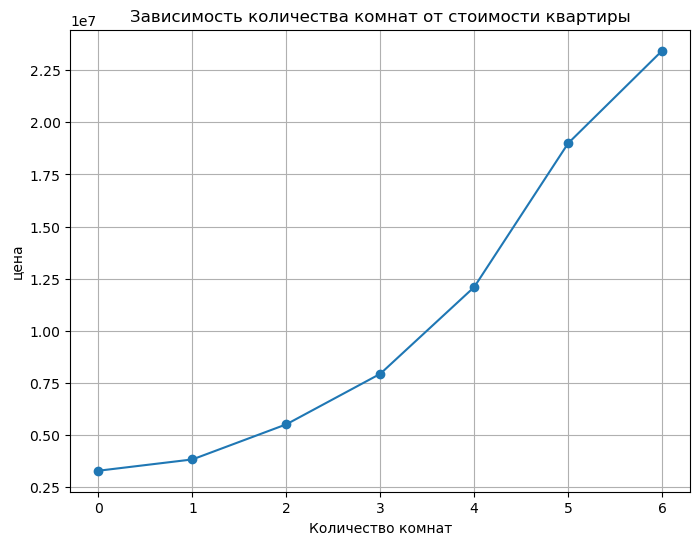

In [93]:
data_new.pivot_table(index = 'rooms',
                     values = 'last_price').plot(marker = 'o',grid=True, figsize=(8, 6), legend=False);
plt.title('Зависимость количества комнат от стоимости квартиры');
plt.xlabel('Количество комнат');
plt.ylabel('цена');

Видим, что чем больше комнат, тем дороже квартира. Прямопропорциональная зависимость

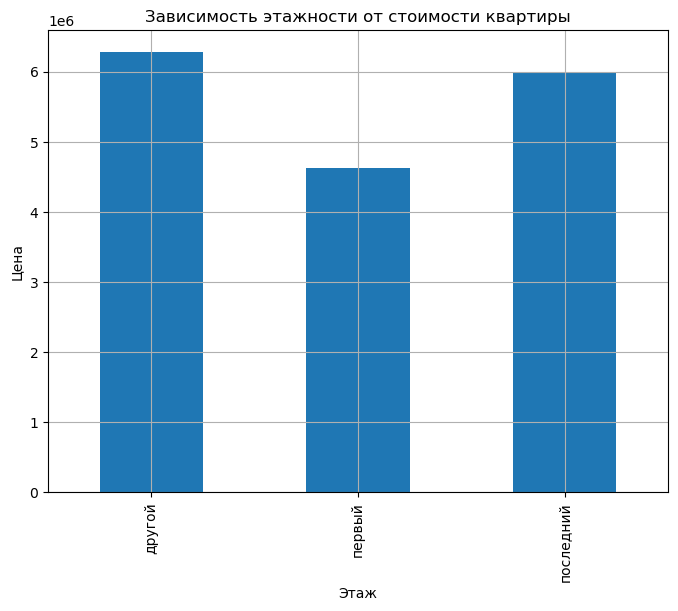

In [94]:
#floor_category
data_new.pivot_table(index = 'floor_category',
                     values = ['last_price']).plot(kind = 'bar',grid=True, figsize=(8, 6), legend=False);
plt.title('Зависимость этажности от стоимости квартиры');
plt.xlabel('Этаж');
plt.ylabel('Цена');

Видим, что обычно квартира дороже, если это не первый и не последний этаж. Последний этаж не намного дешевле, чем этажи из категории "Другие", в отличии от цены за квартиру на первом этаже
Все логично: Цены ниже, потому что на последним эаже могут быть протечки крыши, а на первом мало кто хочет жить

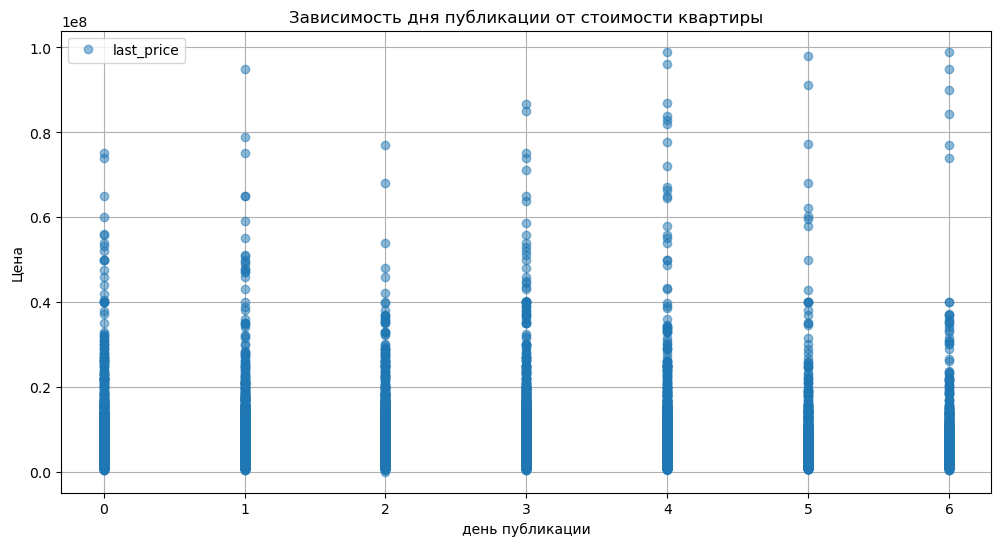

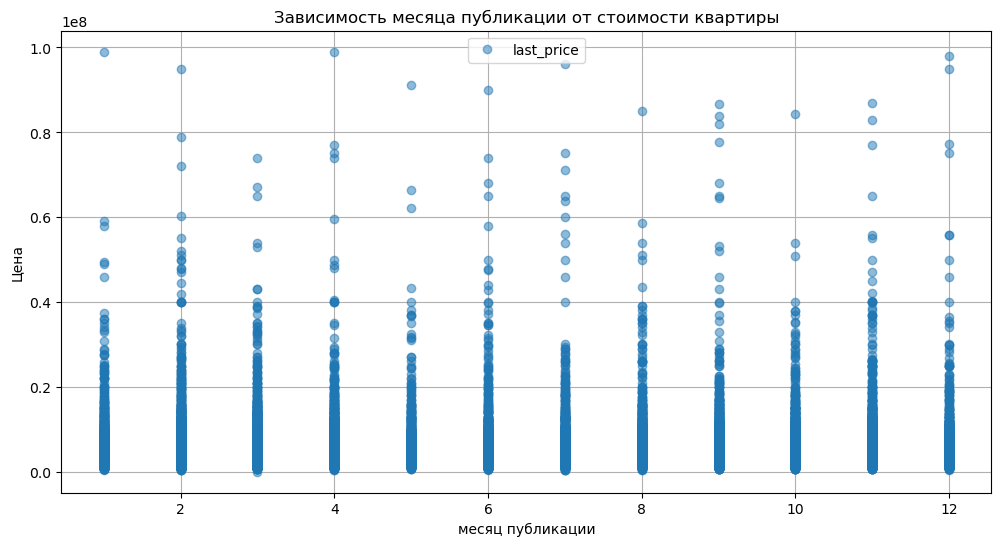

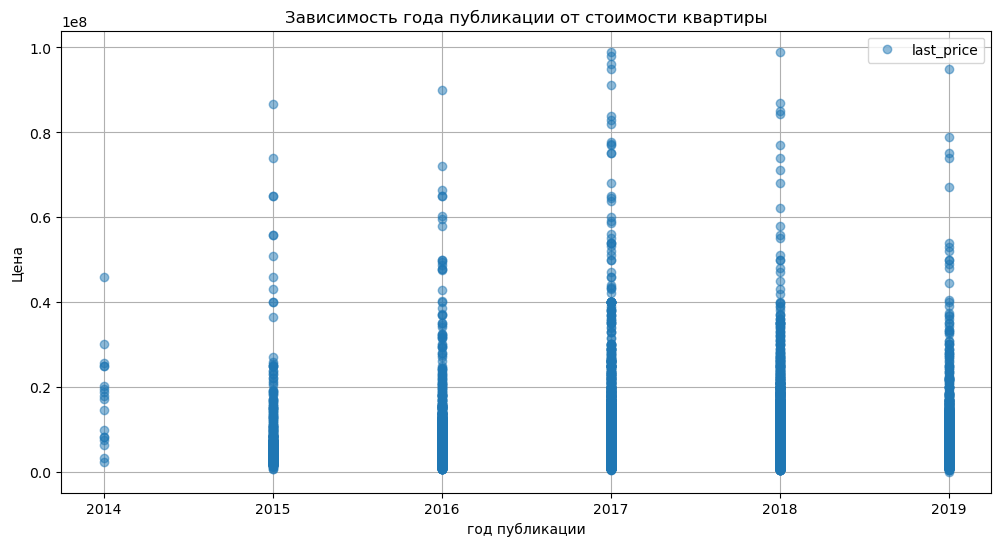

In [95]:
#day_of_publication,month_of_publication,year_of_publication
# график дня недели от стоимости
data_new.plot(x = 'day_of_publication', y = 'last_price', style='o', grid=True, figsize=(12, 6), alpha=0.5)
plt.title('Зависимость дня публикации от стоимости квартиры')
plt.xlabel('день публикации')
plt.ylabel('Цена')

# график месяца от стоимости
data_new.plot(x = 'month_of_publication', y = 'last_price', style='o', grid=True, figsize=(12, 6), alpha=0.5)
plt.title('Зависимость месяца публикации от стоимости квартиры')
plt.xlabel('месяц публикации')
plt.ylabel('Цена')

#график года от стоимости
data_new.plot(x = 'year_of_publication', y = 'last_price', style='o', grid=True, figsize=(12, 6), alpha=0.5)
plt.title('Зависимость года публикации от стоимости квартиры')
plt.xlabel('год публикации')
plt.ylabel('Цена');


Видим, что цена не зависит от дня недели, месяца и года.

In [96]:
corr_param = data.select_dtypes(['int','float']).columns
corr_matrix = data_new[corr_param].corr()
corr_matrix

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_meter,day_of_publication,month_of_publication,year_of_publication,cityCenters_nearest_kilometers
total_images,1.000000,0.141666,0.125294,0.106662,0.002148,0.013530,0.113974,0.032383,0.033112,-0.030324,-0.026636,0.110275,0.050995,-0.002331,-0.051881,0.036654,-0.005838,0.011395,-0.004593,0.015664,0.138798,-0.011368,0.006992,0.134287,-0.051423
last_price,0.141666,1.000000,0.759192,0.443775,0.076726,0.025856,0.666962,0.047156,-0.003739,-0.041751,-0.011726,0.572582,0.021527,-0.031091,-0.297509,0.270908,-0.002797,0.274415,-0.121255,0.087469,0.718576,0.001530,0.000499,-0.022064,-0.297982
total_area,0.125294,0.759192,1.000000,0.750880,0.066016,-0.060512,0.928867,-0.022512,-0.014788,-0.083116,-0.039220,0.591653,0.025217,-0.020117,-0.221584,0.183593,-0.003133,0.189789,-0.095830,0.121491,0.237606,-0.001164,0.000194,-0.050119,-0.221769
rooms,0.106662,0.443775,0.750880,1.000000,0.034504,-0.226409,0.846815,-0.156611,-0.009900,-0.157882,-0.096461,0.227246,-0.003270,-0.051742,-0.162165,0.132461,-0.040038,0.105319,-0.051186,0.104965,-0.000968,-0.001206,-0.006970,-0.026939,-0.162014
ceiling_height,0.002148,0.076726,0.066016,0.034504,1.000000,-0.027207,0.064529,-0.012204,-0.030001,0.000703,0.018933,0.063321,0.030971,-0.015496,-0.068954,0.049177,-0.016079,0.055551,-0.043777,0.011733,0.106277,-0.010162,-0.002741,0.002980,-0.068902
floors_total,0.013530,0.025856,-0.060512,-0.226409,-0.027207,1.000000,-0.169382,0.679099,-0.000802,0.069211,0.050391,0.196039,0.174301,0.113090,0.001802,-0.152720,0.097557,-0.059908,0.070091,-0.052755,0.196640,0.012697,0.017112,-0.001503,0.001509
living_area,0.113974,0.666962,0.928867,0.846815,0.064529,-0.169382,1.000000,-0.104519,-0.018387,-0.062154,-0.037985,0.380501,-0.002159,-0.048217,-0.216566,0.194613,-0.037557,0.170940,-0.079656,0.116806,0.152043,-0.000173,-0.010665,-0.040458,-0.216719
floor,0.032383,0.047156,-0.022512,-0.156611,-0.012204,0.679099,-0.104519,1.000000,-0.000989,0.035959,0.033693,0.153918,0.168207,0.076743,0.000993,-0.101023,0.078564,-0.036178,0.045029,-0.040557,0.159899,0.010248,0.019236,0.000841,0.000784
is_apartment,0.033112,-0.003739,-0.014788,-0.009900,-0.030001,-0.000802,-0.018387,-0.000989,1.000000,0.000772,0.000429,-0.009894,-0.157340,0.007544,-0.003686,-0.001359,-0.022600,-0.007415,0.010247,-0.061028,0.006925,0.009520,0.117718,0.228912,-0.004228
studio,-0.030324,-0.041751,-0.083116,-0.157882,0.000703,0.069211,-0.062154,0.035959,0.000772,1.000000,-0.004401,NaN,0.027140,-0.022502,-0.008462,-0.032006,0.012903,-0.008639,0.000495,-0.029516,0.019480,-0.003006,0.001196,0.006760,-0.008995


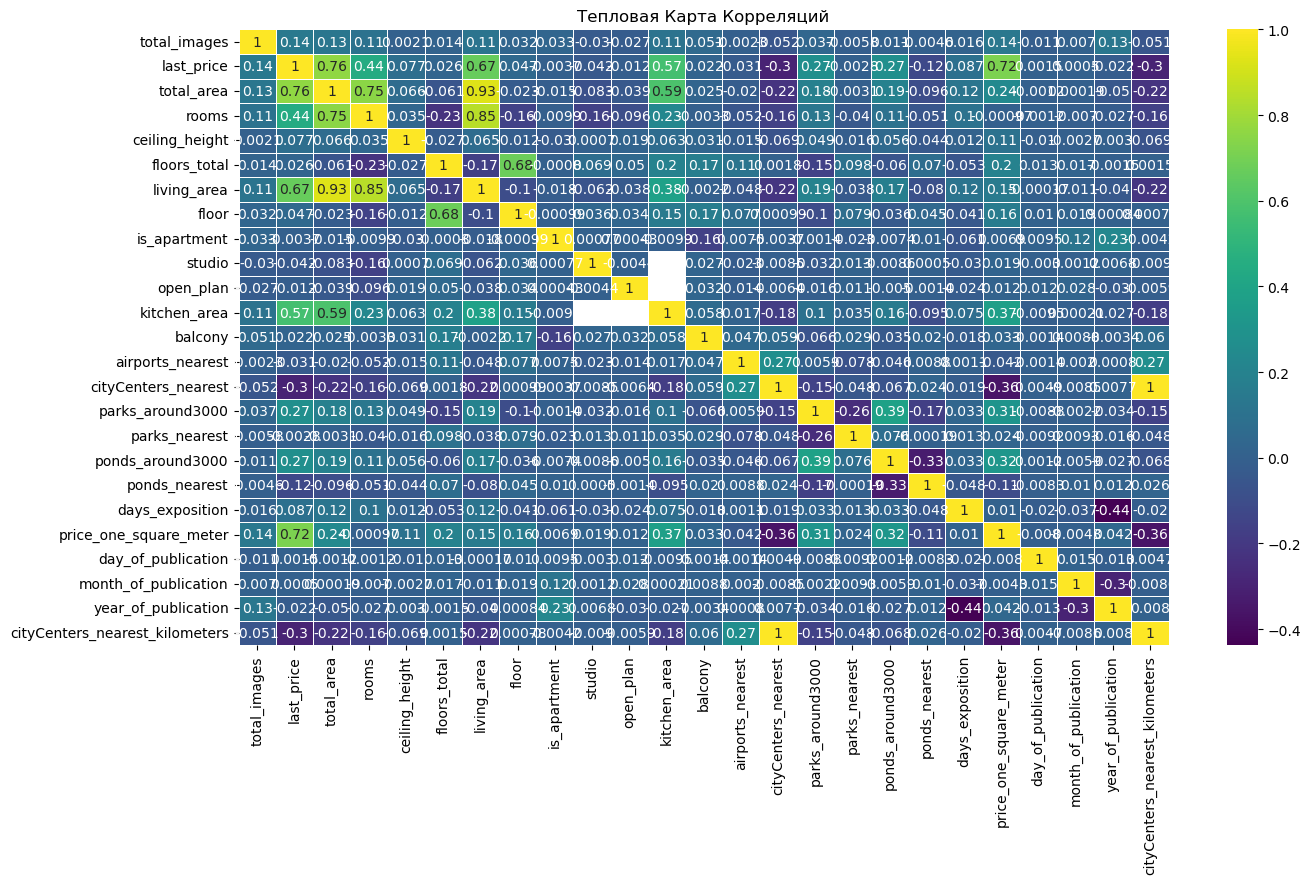

In [97]:
plt.figure(figsize=(15, 8))
heatmap = seaborn.heatmap(
    corr_matrix,
    annot=True,
    cmap="viridis",
    linewidths=0.5
)

plt.title("Тепловая Карта Корреляций")
plt.yticks(rotation=0)
plt.show()

**Вывод: На стоимость объекта больше всего влияет общая площадь квартиры и этаж расположения квартиры. Чем больше площадь, тем выше стоимость. На первом и последнем этажах стоимость квартиры меньше, чем на остальных. Дата публикации объявления на стоимость не влияет**

 ### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [98]:
top_10_locals = data['locality_name'].value_counts().head(10) # топ 10 населённых пунктов с наибольшим числом объявлений
top_10_locals

locality_name
санкт-петербург      15721
поселок мурино         556
поселок шушары         440
всеволожск             398
пушкин                 369
колпино                338
поселок парголово      327
гатчина                307
деревня кудрово        299
выборг                 237
Name: count, dtype: int64

с помощью метода pivot_table и query создадим таблицу

In [99]:
local_price_square = (data.query('locality_name in @top_10_locals.index').pivot_table(index = 'locality_name', values = 'price_one_square_meter'))
local_price_square

,price_one_square_meter
locality_name,
всеволожск,68654.473970
выборг,58141.909325
гатчина,68746.146515
деревня кудрово,92473.547559
колпино,75424.579112
поселок мурино,85681.762572
поселок парголово,90175.913089
поселок шушары,78677.364318
пушкин,103125.819377


In [100]:
local_price_square.sort_values('price_one_square_meter',ascending = False)

,price_one_square_meter
locality_name,
санкт-петербург,114849.008793
пушкин,103125.819377
деревня кудрово,92473.547559
поселок парголово,90175.913089
поселок мурино,85681.762572
поселок шушары,78677.364318
колпино,75424.579112
гатчина,68746.146515
всеволожск,68654.473970


**Вывод: в Санкт-Петербурге самая дорогая цена за квадратный метр - 107866, в отличие от Выборги, где цена кв. м. - 58141**

### Выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите их среднюю стоимость на разном удалении от центра

- учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
- описано, как стоимость объекта зависит от расстояния до центра города;
- построен график изменения средней цены для каждого километра от центра Петербурга.

In [101]:
saint_piterburg = data.query('locality_name == "санкт-петербург"')
saint = saint_piterburg.pivot_table(index = 'cityCenters_nearest_kilometers',values = 'price_one_square_meter',aggfunc = 'mean')
saint

,price_one_square_meter
cityCenters_nearest_kilometers,
0.0,245833.530370
1.0,177005.407604
2.0,157849.007290
3.0,121387.453743
4.0,133282.874738
5.0,140509.789022
6.0,151012.193673
7.0,156176.879524
8.0,125671.442864


Я решила взять стоимость за квадратный метр, так как эта величина более устойчива к изменением и более наглядна

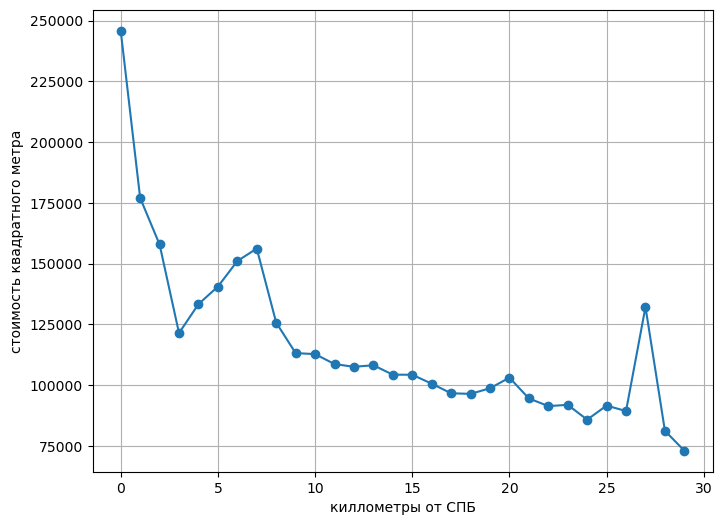

In [102]:
saint.plot(marker='o', grid=True, figsize=(8, 6), legend=False)
plt.xlabel('киллометры от СПБ')
plt.ylabel('стоимость квадратного метра');

*Вывод: Видим, как постепенно удаляясь от Санкт-Питербурга, цена квадратного метра идет на спад. Пик цены До 1км от Питербурга, далее график идет на снижение, а после снова идет вверх на 27ом километре*

## Напишите общий вывод

1. Предобработка данных.
- Зафиксировали большое количество пропусков. Больше всего пропусков там, где значения заполнялись автоматически.
- Заменили можем заменить значение NaN на нули в столбце balcony, parks_around3000, ponds_around3000
- На общее количество этажей влияет этаж квартиры, поэтому заполнили пропуски в этом столбце на медианное значение по каждому типу из столбца floor.
- Удалили строчки, где не указан город
- Изменили типы данных у некоторых столбцов
- Избавились от дубликатов locality_name

- Отдельно выделю то, что я не стала удалять много пропущенных значений, посколько посчитала это ненужным, больше всего пропусков было в столбцах, которые мы мало использовали, но даже там нам нужны были данные без замен. Я решила их оставить на всякий случай и не заменять на медианы, поскольку никакоц связи обнаружено мной не было

2. Добавляем новые данные
-  цена одного квадратного метра - `price_one_square_meter`
-  день недели публикации объявления - `day_of_publication`
-  месяц публикации объявления - `month_of_publication`
-  год публикации объявления - `year_of_publication`
-  тип этажа квартиры (добавили с помощью функции) - `floor_category`
-  расстояние до центра города в километрах - `cityCenters_nearest_kilometers`
3. Исследовательский анализ данных.
Мы создали новый датаврейм `data_new`, в котором убрали почти все ненужные хвосты
Расчитали процент выбросов от основной массы
Избавились от аномальных значений
-  Общая площадь: Чаще всего квартиры общей площадью от ~ 35 до 52 кв.м 
- Жилая площадь: Чаще всего жилая площадь составляет 30 кв.м., так же есть всплеск в районе 18-19 кв.м
-  Площадь кухни: Установили, что размер кухни зависит от общего размеры квартиры, но при этом не зависит от жилой площади помещения.  Чаще всего площадь кухни от 5 до 12 кв. м
-  Цена объекта: Обычная цена квартиры вальируется от 3х до 5 млн. Очень редко бывают значения больше 30 млн. 
-  Количество комнат: Мы проанализировали, что квартиры могут быть без комнат. Чаще всего в квартирах 2 комнаты
-  Высота потолков: Чаще всего в домах потолки 2,6 метра
-  Тип этажа квартиры: Видно, что объекты недвижимости, расположенные на первом и последним этажах имеют примерно одинаковые значения и их доля не столь велика. В основном объекты расположены на этажах между первым и последним.
-  Общее количество этажей в доме: Большинство людей живут на 5ом этаже.
-  Расстояние до центра города в метрах: Большинство объектов недвижимости расположены на удалении 13-14 км от центра. 
-  Расстояние до ближайшего парка: Большинство объектов недвижимости расположены на удалении от ближайшего парка на расстоянии 400-600м. Ближайшие к парку объект на расстоянии 500м.

4. Изучите, как быстро продавались квартиры (столбец days_exposition)

Изучив столбец, мы избавились от хвоста, который составлял 7% от данных. При этом сделали вывод, что быстрая продажа - до 45 дней, а медленная от 182 до 510 дней

5. Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта

На стоимость объекта больше всего влияет общая площадь квартиры и этаж расположения квартиры. Чем больше площадь, тем выше стоимость. На первом и последнем этажах стоимость квартиры меньше, чем на остальных. Дата публикации объявления на стоимость не влияет

6. Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

Изучив данные, мы пришшли к выводу, что в Санкт-Петербурге самая дорогая цена за квадратный метр - 107866, в отличие от Выборги, где цена кв. м. - 58141. Что означает, что самые дорогие квартиры в Санкт-Питербурге, а самые дешевые в  Выборге

7. Выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите их среднюю стоимость на разном удалении от центра

Чем дальше мы от Санкт-питербурга тем дешевле стоят квартиры, но на 37 км от него, цена резко идет вверх

**Рекомендации**

Сделать обязательным для заполнения поле "название населённого пункта", чтобы покупатели понимали, что квартира существует
Сделать ограничение по вводу в "высота потолков", чтобы не было аномалий, где потолок 23 метра

Расчитать другие метрики(например как влияет количество фотографий на покупку, или может ли быть что обьявления без фотографий это мошенническая деятельность) и сделать фото обязательными, так покупатель поймет, что его не обманывают 


**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.